In [85]:
#s0 libs

using Combinatorics
using DelimitedFiles
using Distributions
using Plots
using StatsBase
using Test

#=
intent
take an array of durations of seclusion
count the actua distribution of durations
see this curve as being a probability mass function based on four other curves
over        an even Poisson
under       an odd Poisson
between     a recurring paraboloid curve which handles the gap between them
     - rescale the gap as a series of trapezoids
     - area of a parabold inside a trapezoid is 2/3 the trapezoid and width is fixed
leftover    an error function with its own polynomial mechanics


=#

#s1 config

function get_even_labda()
    labda::Int64    = 8
    return labda
end

function get_limit()
    limit           = 3 # days, conventionally a whole number, or round fractions like 0.5
    return limit
end

function get_odd_labda()
    labda::Int64    = 12
    return labda
end

function get_width_of_hists()
    width_of_hists  = 5
    return width_of_hists
end

function get_width_of_two_hr()
    width_of_two_hr  = 120
    return width_of_two_hr
end


#s2 in out read draw

function draw_cont_scat_freqs(limited)
    count_durs      = collect(countmap(limited))
    durs            = [x[1] for x in count_durs]
    freqs           = [x[2] for x in count_durs]
    cont_scat_freqs = scatter(durs, freqs, alpha=0.25, title="durations", legend=false)
    return cont_scat_freqs
end

function draw_hist_freqs(limited)
    limit           = get_limit()
    minutes         = limit*24*60
    width_of_hists  = get_width_of_hists()
    n_hists::Int    = minutes/width_of_hists
    println("in the bar chart each bar covers:\t\t", width_of_hists, " minute(s) as set in settings.")
    println("...so there are:\t\t\t\t", n_hists, " slices in graphs i.e. total time div by width of bar.")
    hist_freqs      = histogram(limited, bins=n_hists, alpha=0.5, legend=false, title="durations")
    return hist_freqs
end

function draw_scat_abs(limited)
    orders          = 1:length(limited)
    scat_abs        = scatter(orders, limited, alpha=0.02, title="ordered length", legend=false)
    return scat_abs
end

function draw_scat_logs(limited)
    orders          = 1:length(limited)
    log_abs         = [log2(d) for d in limited]
    scat_logs       = scatter(orders, log_abs, alpha=0.1, title="log length by order", legend=false)
    return scat_logs
end

function read_durations()
    output_matrix = readdlm("durations.txt", ' ', Float64, '\n')
    durations     = output_matrix[1,:]
    return durations
end


#s3 model

function count_limited()
    durations           = read_durations()
    total               = length(durations)
    limit               = get_limit()
    limited             = [d for d in durations if d<=limit]
    cumulative_fraction = length(limited)/total
    return limited
end

function get_xs()
    limit           = get_limit()
    minutes         = limit*24*60
    width_of_hists  = get_width_of_hists()
    n_hists::Int    = minutes/width_of_hists
    xs              = [float(x) for x in collect(1:n_hists)]
    return xs
end

function get_even_odd_review_durations()
    limit                      = get_limit()
    minutes                    = limit*24*60
    
    width_of_two_hr            = get_width_of_two_hr()
    n_two_hr_blocks::Int       = minutes/width_of_two_hr
    
    review_range               = collect(1:n_two_hr_blocks)
    even_review_durations      = [60*r*2 for r in review_range]
    odd_review_durations       = [h-60 for h in even_review_durations]
    even_odd_review_durations  = even_review_durations, odd_review_durations 
    return even_odd_review_durations
end

function harry_maths()
    limited                = count_limited()
    count_durs             = collect(countmap(limited))
    durs                   = [x[1] for x in count_durs]
    freqs                  = [x[2] for x in count_durs]
    harry_graph            = scatter(durs, freqs, alpha=0.25, title="harry", legend=false)
    
    return harry_graph
end

function initial_analysis()
    limited         = count_limited()
    scat_logs       = draw_scat_logs(limited)
    scat_abs        = draw_scat_abs(limited)
    initial         = plot(scat_abs, scat_logs, layout=(1,2), legend=false)
    return initial
end

function my_poisson(k::Int64, labda::Int64)    
    probability = (labda^k)*(ℯ^(-labda))/factorial(big(k))
    return probability
end

function no_real_analysis()
    limited         = count_limited()
    cont_scat_freqs = draw_cont_scat_freqs(limited)
    hist_freqs      = draw_hist_freqs(limited)
    unanalysed      = plot(cont_scat_freqs, hist_freqs, layout=(1,2), legend=false)
    return unanalysed
end

function dist_poisson(xs, labda)
    xs              = [trunc(Int64,x) for x in xs]
    ys              = [my_poisson(x, labda) for x in xs]
    return ys
end

function tell_config()
    limit               = get_limit()
    durations           = read_durations()
    total               = length(durations)
    limited             = [d for d in durations if d<=limit]
    cumulative_fraction = length(limited)/total
    println("only looking at first:\t\t\t\t",limit," days")
    println("proportion out by then is about:\t\t", trunc(Int64,cumulative_fraction*100),"%")
end



tell_config (generic function with 1 method)

In [79]:
function harry_main()
    tell_config()
    unanalysed      = no_real_analysis()
    initial         = initial_analysis()
    harry_graph     = harry_maths()
    return unanalysed, initial, harry_graph
end

unanalysed, initial, harry_graph = harry_main();
    

only looking at first:				3 days
proportion out by then is about:		87%
in the bar chart each bar covers:		5 minute(s) as set in settings.
...so there are:				864 slices in graphs i.e. total time div by width of bar.


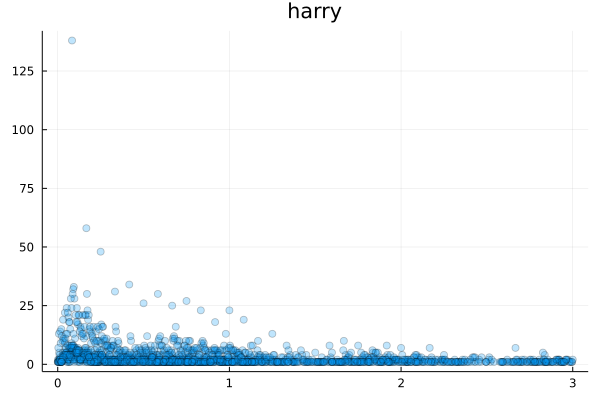

In [80]:
harry_graph

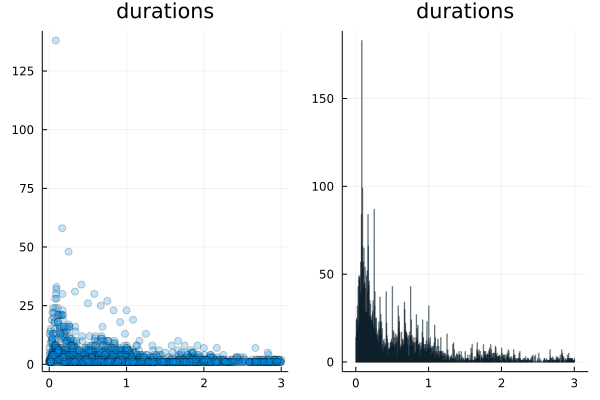

In [81]:
unanalysed

In [82]:
initial

In [92]:
#s7 tests

function test_get_xs()
    xs              = get_xs()
    limit           = get_limit()
    minutes         = limit*24*60
    width_of_hists  = get_width_of_hists()
    n_hists::Int    = minutes/width_of_hists
    @test length(xs) == n_hists
    println("passed get_xs")
end
#=
function test_operate_on()
    xs = get_xs()
    ys = operate_on(xs)
    @test typeof(ys) == Vector{BigFloat}
    println("passed type testing for operate_on")
end
=#
function test_get_even_odd_review_durations()
    even_odd_review_durations  = get_even_odd_review_durations()
    @test typeof(even_odd_review_durations) == Tuple{Vector{Int64}, Vector{Int64}}
    even_review_durations = even_odd_review_durations[1]
    odd_review_durations  = even_odd_review_durations[2]
    @test mean(.>(even_review_durations, odd_review_durations))==1.0
    println("passed get_even_odd_review_durations")
end

test_get_even_odd_review_durations (generic function with 1 method)

my scores:	BigFloat[0.0026837010232200948257885730896532550104893743991851806640625, 0.01073480409288037930315429235861302004195749759674072265625, 0.02862614424768101147507811295630138677855332692464192708333333333333333333333342, 0.05725228849536202295015622591260277355710665384928385416666666666666666666666685, 0.09160366159257923672024996146016443769137064615885416666666666666666666666666674, 0.122138215456772315626999948613552583588494194878472222222222222222222222222222, 0.1395865319505969321451427984154886669582790798611111111111111111111111111111117, 0.1395865319505969321451427984154886669582790798611111111111111111111111111111117, 0.1240769172894194952401269319248788150740258487654320987654320987654320987654321, 0.09926153383153559619210154553990305205922067901234567901234567901234567901234521, 0.07219020642293497904880112402902040149761503928170594837261503928170594837261499, 0.04812680428195665269920074935268026766507669285447063224841002618780396558174315, 0.029616494942742

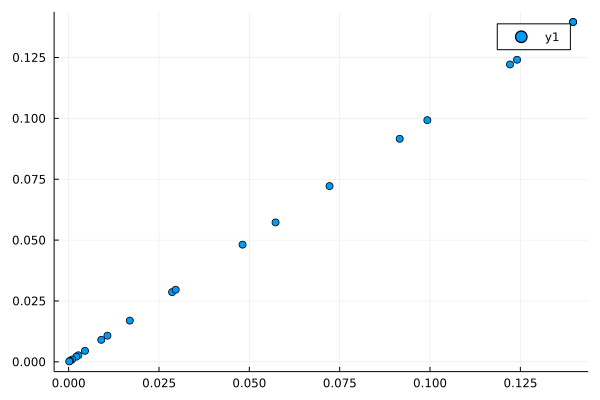

In [93]:
function test_my_poisson()
    xs         = collect(1:20) 
    labda      = get_even_labda()
    my_scores  = dist_poisson(xs, labda)
    println("my scores:\t", my_scores)
    
    their_pdf = Poisson(labda)
    their_scores = [pdf(their_pdf,x) for x in xs]

end

p = test_my_poisson()

In [91]:
function harry_tests()
    test_get_even_odd_review_durations()
    test_my_poisson()
    test_get_xs()
    #test_operate_on()
    println("passed all tests")
end

harry_tests()

my pdf:	BigFloat[0.0026837010232200948257885730896532550104893743991851806640625, 0.01073480409288037930315429235861302004195749759674072265625, 0.02862614424768101147507811295630138677855332692464192708333333333333333333333342, 0.05725228849536202295015622591260277355710665384928385416666666666666666666666685, 0.09160366159257923672024996146016443769137064615885416666666666666666666666666674, 0.122138215456772315626999948613552583588494194878472222222222222222222222222222, 0.1395865319505969321451427984154886669582790798611111111111111111111111111111117, 0.1395865319505969321451427984154886669582790798611111111111111111111111111111117, 0.1240769172894194952401269319248788150740258487654320987654320987654320987654321, 0.09926153383153559619210154553990305205922067901234567901234567901234567901234521, 0.07219020642293497904880112402902040149761503928170594837261503928170594837261499, 0.04812680428195665269920074935268026766507669285447063224841002618780396558174315, 0.029616494942742555

In [84]:
#=
    xs                  = get_xs()
    even_labda          = get_even_labda()
    even_scale          = 1000
    unscaled_even_ys    = dist_poisson(xs, even_labda)
    even_ys             = .*(unscaled_even_ys, even_scale)
    
    odd_labda           = get_odd_labda()
    odd_scale           = 1000
    unscaled_odd_ys     = dist_poisson(xs, odd_labda)
    odd_ys              = .*(unscaled_odd_ys, odd_scale)
    
    max_x               = maximum(xs)
    c                   = 50
    straight_line       = [c-(c*(x/max_x)) for x in xs]
    println(straight_line)
    
    ys                  = .+(even_ys, odd_ys, straight_line) 
    summed_poisson      = scatter(xs,ys)
    =#